Team META
* Akhilesh Dongre
* Krishnanand Jha
* Janhvi Shah
* Manav Malavia
* Jaimeen Unagar




## PART 1. Focus on the stock you pick and their competitors
- Report summary statistics of the training period and plot the kernel density

| Symbol | Company |
---|---|
| META | Meta Platforms  | 1991 |
| NVDA | Nvidia Corporation | 1999 |
| ORCL | Oracle  | 1972 |
| GOOG| Google | 1991 |
| AAPL| Apple Inc | 1997 |




In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
import yfinance as yf

In [ ]:
# Set up End and Start times for data grab
end = datetime(2024,1,31)
start = datetime(2022,1,1)

meta = yf.download('META',start ,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900
2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000
2022-01-05,333.019989,335.760010,323.839996,324.170013,323.826416,20564500
2022-01-06,322.820007,339.170013,322.720001,332.459991,332.107635,27962800
2022-01-07,332.739990,337.000000,328.880005,331.790009,331.438354,14722000


In [ ]:
meta

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900
2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000
2022-01-05,333.019989,335.760010,323.839996,324.170013,323.826416,20564500
2022-01-06,322.820007,339.170013,322.720001,332.459991,332.107635,27962800
2022-01-07,332.739990,337.000000,328.880005,331.790009,331.438354,14722000
...,...,...,...,...,...,...
2024-01-24,390.000000,396.149994,387.809998,390.700012,390.285919,15698500
2024-01-25,390.170013,395.489990,385.660004,393.179993,392.763275,15091100
2024-01-26,394.350006,396.790009,391.589996,394.140015,393.722260,13163700


# Plot histogram and line graph for open , close high, low,adj close , volume

Line Chart:
 Displays the sequential progression of market prices (open, close, low, high) over time, offering a narrative of price movements and potential trading opportunities.

Histogram: Represents the distribution of market price levels (open, close, low, high) within predefined ranges, offering a visual summary of price volatility and potential support/resistance levels




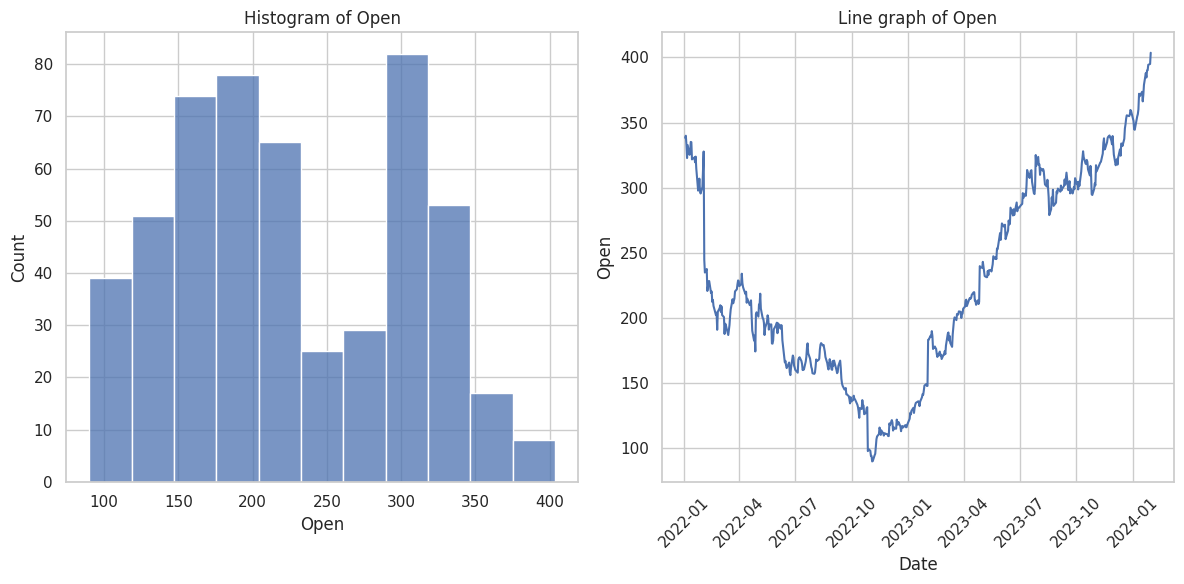

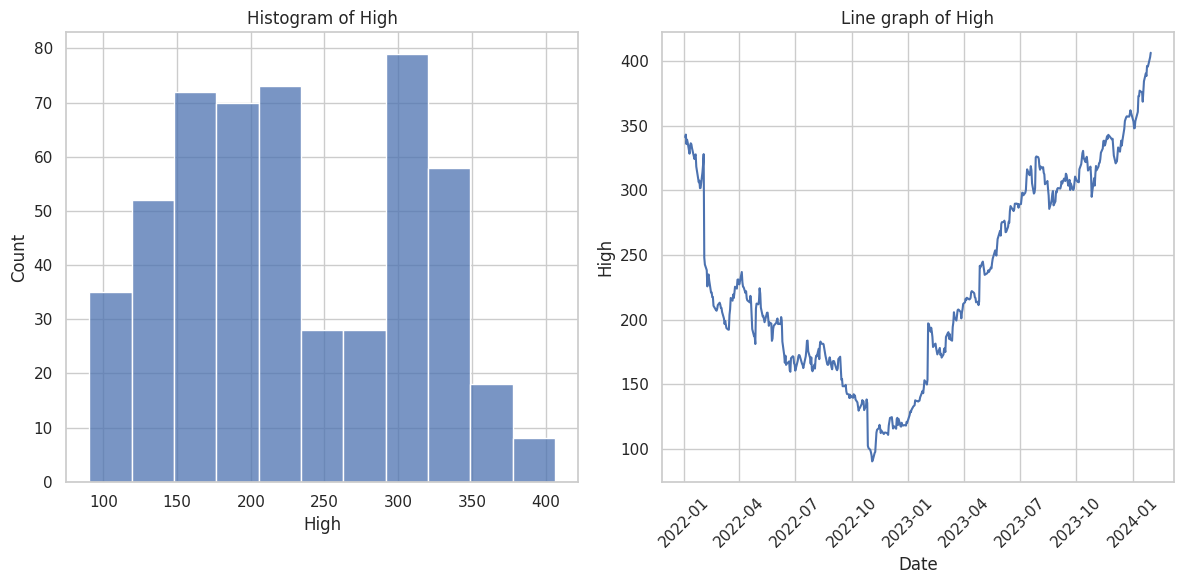

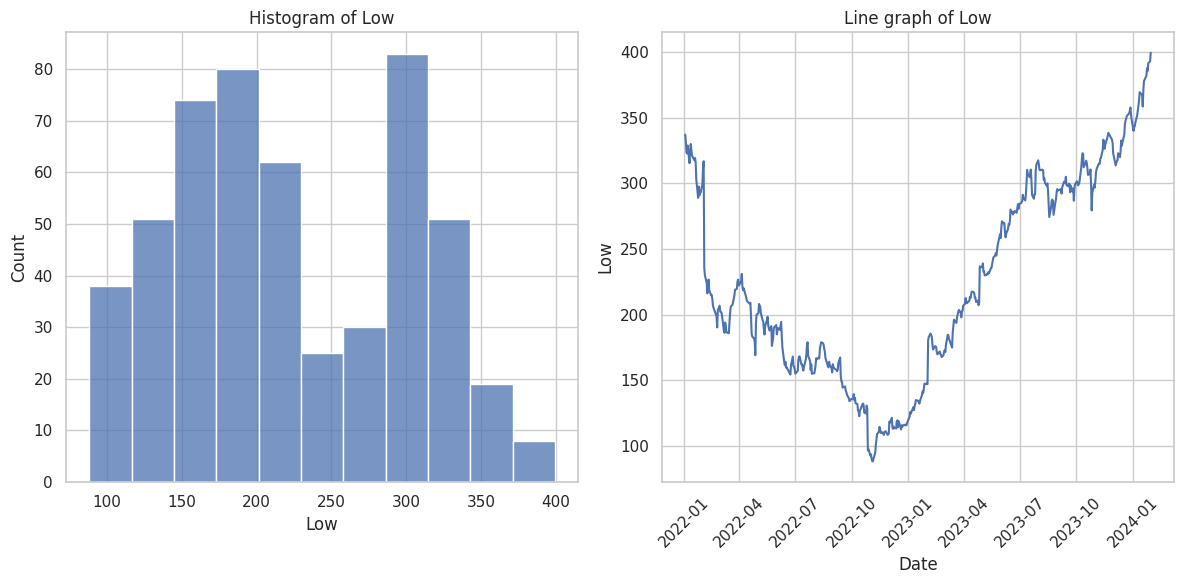

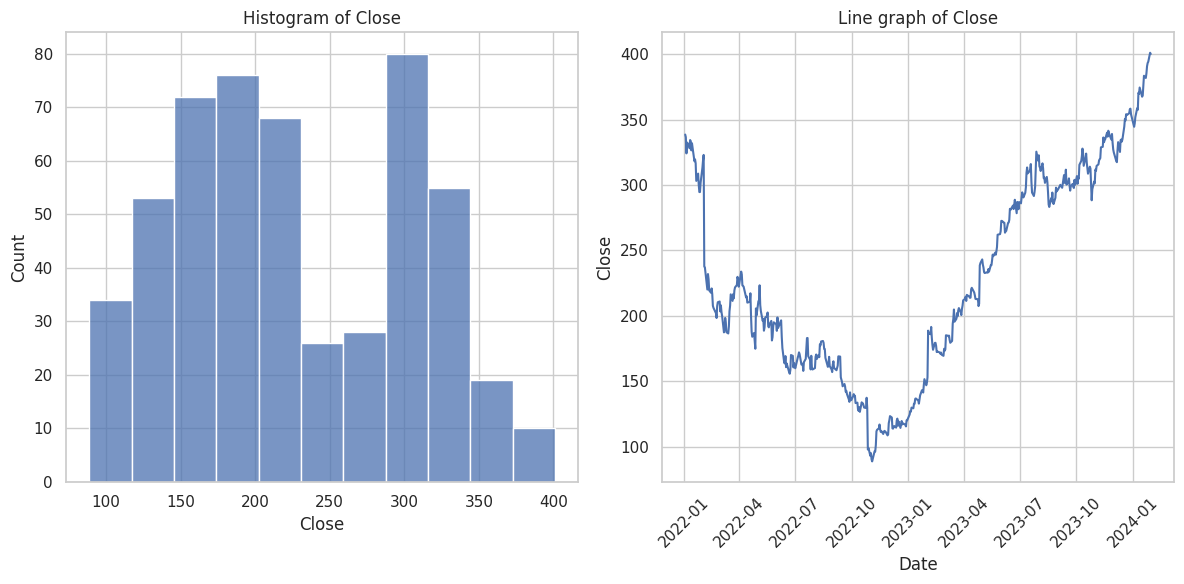

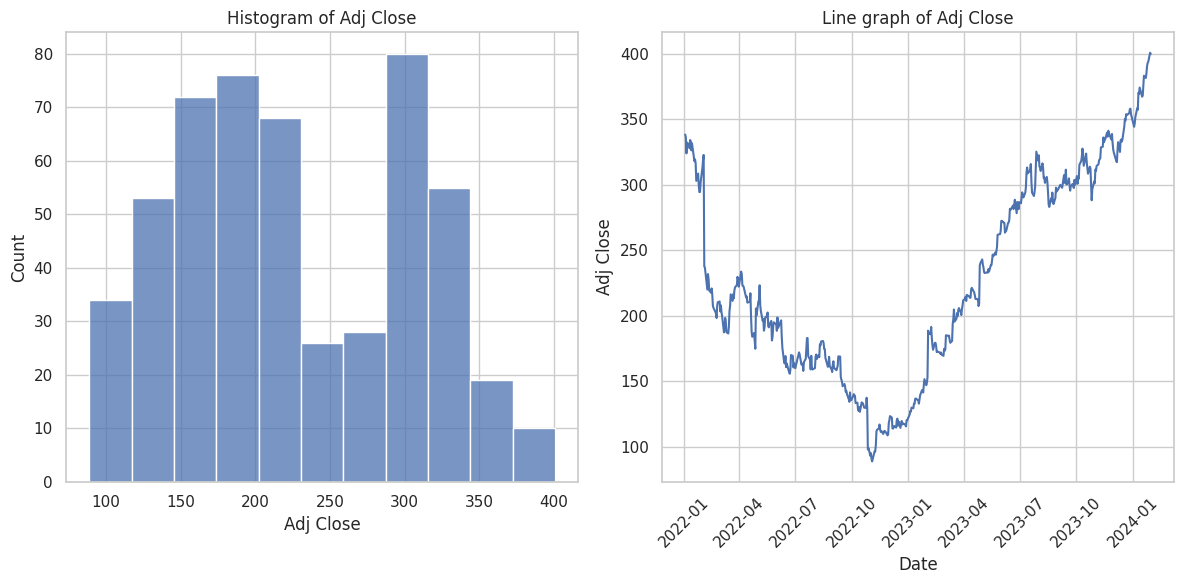

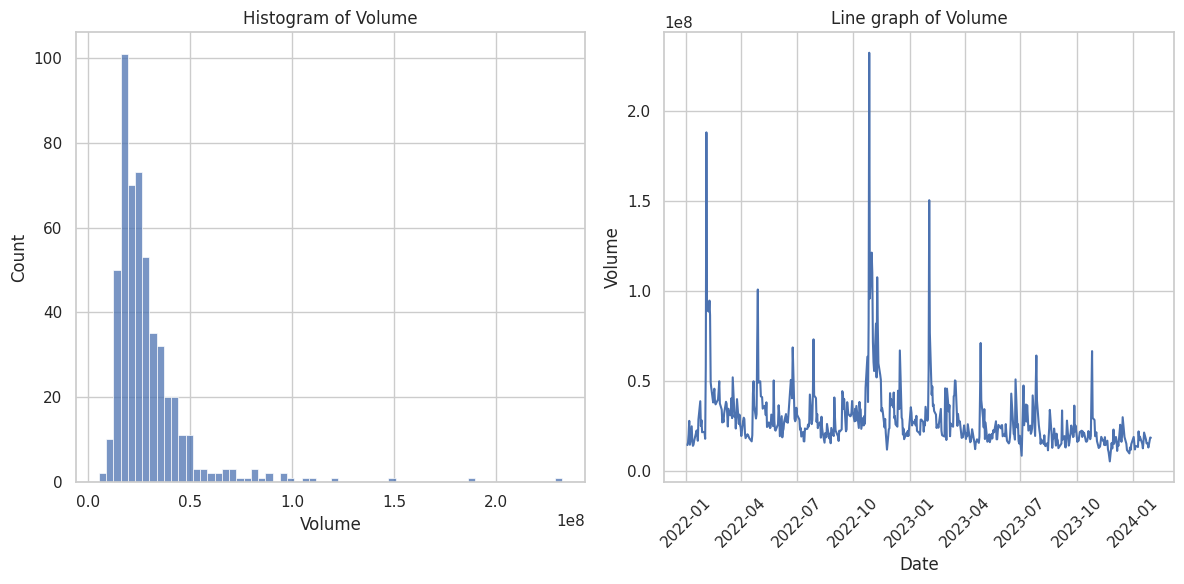

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram for each column
for col in meta.columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(meta[col])
    plt.title(f'Histogram of {col}')

    # Line graph for each column
    plt.subplot(1, 2, 2)
    sns.lineplot(data=meta, x=meta.index, y=col)
    plt.title(f'Line graph of {col}')
    plt.xticks(rotation=45)  # Rotate X-axis labels for better readability

    plt.tight_layout()
    plt.show()


Plot candlestick chart  for meta


In [ ]:
import plotly.graph_objects as go
meta = yf.download('META',start ,end)
fig = go.Figure(data=[go.Candlestick(x=meta.index,
                open=meta['Open'],
                high=meta['High'],
                low=meta['Low'],
                close=meta['Close'])])

fig.show()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with candlestick and volume bar chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Candlestick Chart", "Volume"))

# Candlestick chart
fig.add_trace(go.Candlestick(x=meta.index,
                open=meta['Open'],
                high=meta['High'],
                low=meta['Low'],
                close=meta['Close'],
                name='Candlesticks'), row=1, col=1)

# Volume bar chart
fig.add_trace(go.Bar(x=meta.index, y=meta['Volume'], name='Volume'), row=2, col=1)

# Update layout
fig.update_layout(xaxis_rangeslider_visible=False, title='Candlestick Chart with Volume')

# Show the plot
fig.show()


In [ ]:
# Calculate the average for each column
average_values = meta.mean()

# Create a new DataFrame with average values
average_df = pd.DataFrame(average_values, columns=['Average'])

# Display the new DataFrame
print(average_df)


                Average
Open       2.262902e+02
High       2.300646e+02
Low        2.230395e+02
Close      2.265743e+02
Adj Close  2.263342e+02
Volume     2.937721e+07


In [ ]:
# Convert the index to datetime if it's not already in datetime format
meta.index = pd.to_datetime(meta.index)

# Extract the year from the datetime index
meta['Year'] = meta.index.year

# Group by year and calculate the average for each column
average_yearly = meta.groupby('Year').mean()

# Display the new DataFrame
print(average_yearly)


            Open        High         Low       Close   Adj Close        Volume
Year                                                                          
2022  154.802709  156.907809  152.691315  154.835060  153.328144  8.791038e+07
2023  172.256681  173.857520  170.981880  172.549000  171.901759  5.921703e+07
2024  187.625000  189.093999  186.187000  187.890498  187.651049  5.658758e+07


In [ ]:
# Round the average values to a specific number of decimal places
average_yearly_rounded = average_yearly.round(2)

# Display the rounded DataFrame
print(average_yearly_rounded)


        Open    High     Low   Close  Adj Close       Volume
Year                                                        
2022  154.80  156.91  152.69  154.84     153.33  87910376.49
2023  172.26  173.86  170.98  172.55     171.90  59217028.80
2024  187.62  189.09  186.19  187.89     187.65  56587575.00


In [ ]:
meta.describe()

,Open,High,Low,Close,Adj Close,Volume,Year
count,521.000000,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000
mean,164.437908,166.276622,162.753800,164.603954,163.558205,7.293956e+07,2022.556622
std,18.027604,17.720137,18.255094,17.994771,18.211365,2.519315e+07,0.569378
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07,2022.000000
25%,149.130005,151.270004,147.460007,149.839996,148.678177,5.384150e+07,2022.000000
50%,165.190002,167.190002,164.029999,165.630005,164.332855,6.874100e+07,2023.000000
75%,177.520004,179.429993,176.500000,177.820007,177.110367,8.618550e+07,2023.000000
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.826020e+08,2024.000000


In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2022-01-03 to 2024-01-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       521 non-null    float64
 1   High       521 non-null    float64
 2   Low        521 non-null    float64
 3   Close      521 non-null    float64
 4   Adj Close  521 non-null    float64
 5   Volume     521 non-null    int64  
 6   Year       521 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 30.5 KB


Text(0.5, 0, '')

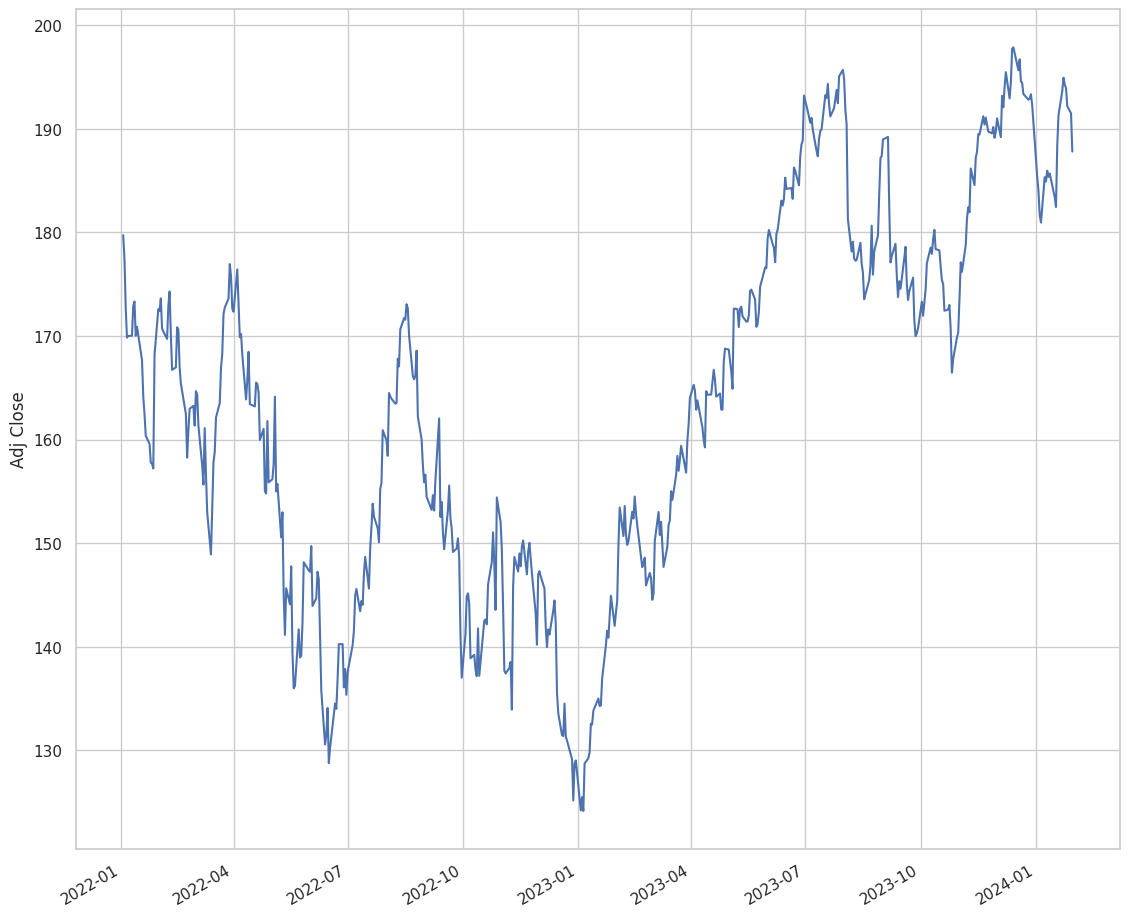

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

meta['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
# plt.title(f"{tech_list[i - 1]}")

Caclulate and plot daily return graph


<Axes: xlabel='Date'>

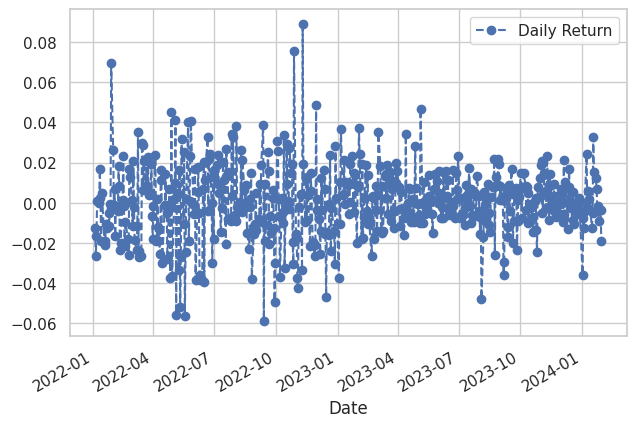

In [ ]:
meta['Daily Return'] = meta['Adj Close'].pct_change()
meta['Daily Return'].plot( legend=True, linestyle='--', marker='o')

Plot histogram and line graph for competitor's stock

[*********************100%%**********************]  1 of 1 completed


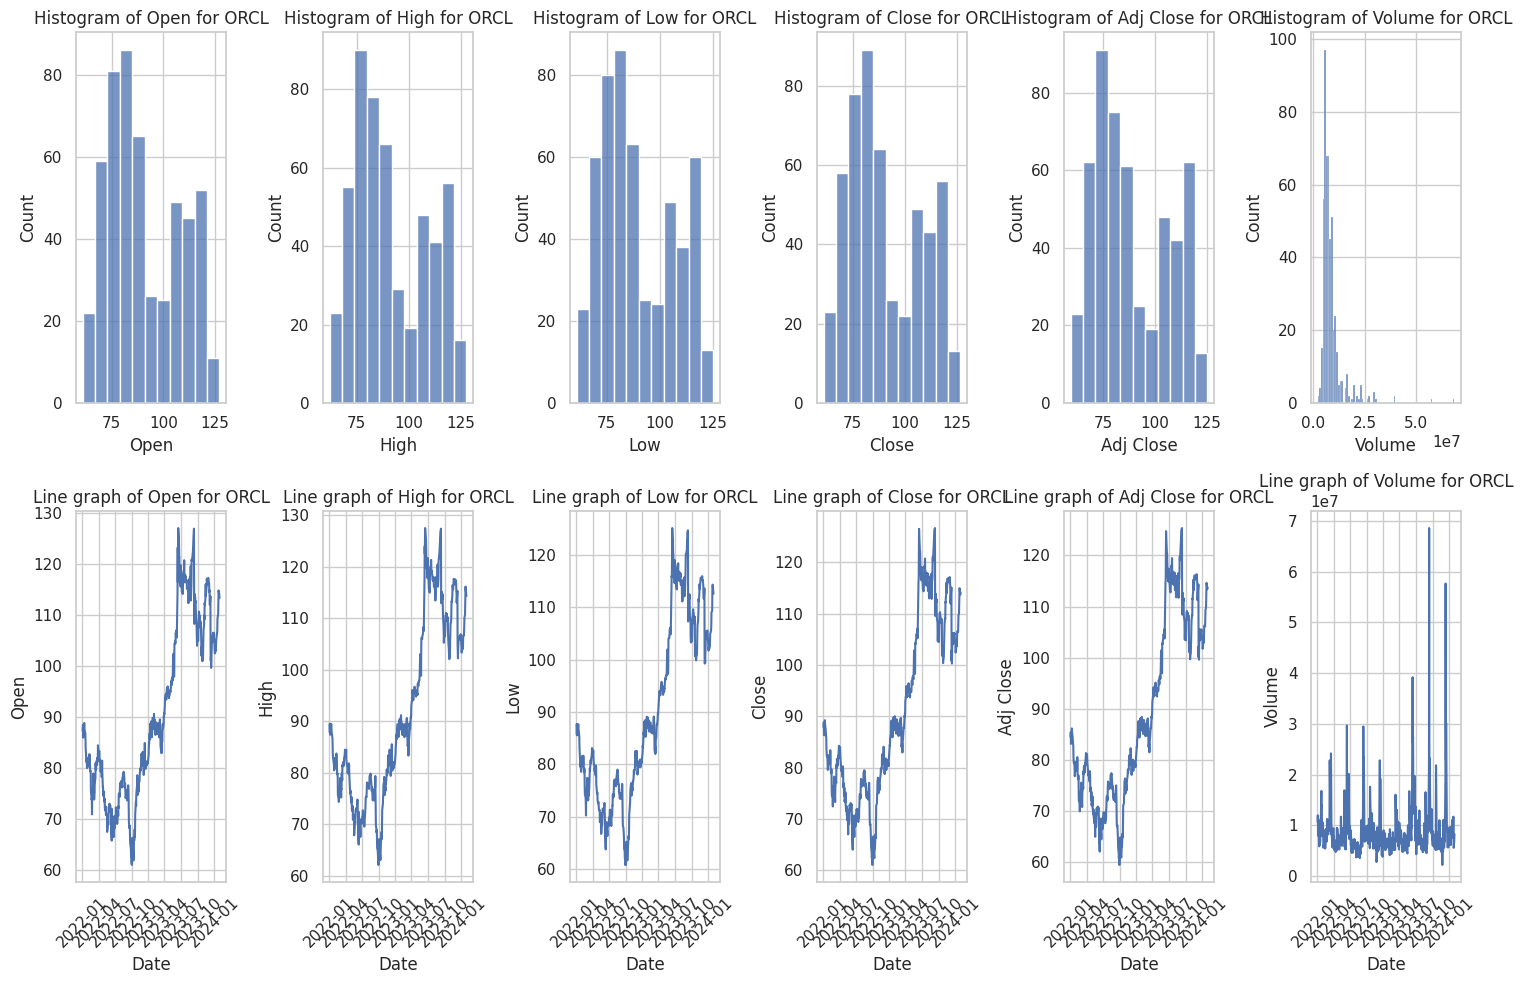

[*********************100%%**********************]  1 of 1 completed


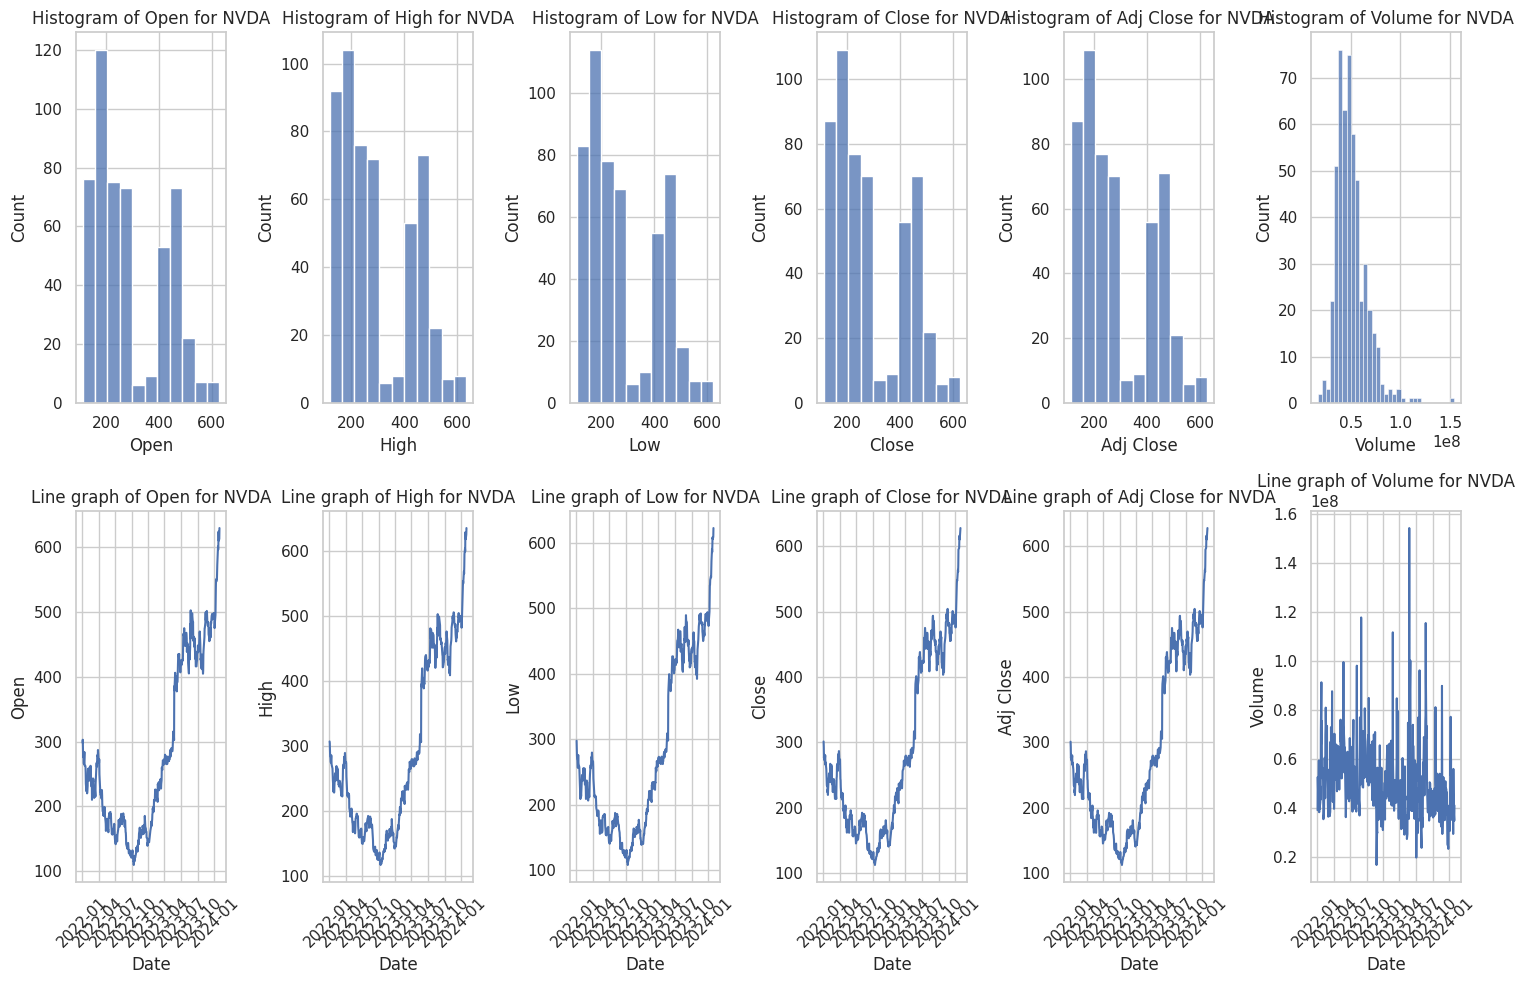

[*********************100%%**********************]  1 of 1 completed


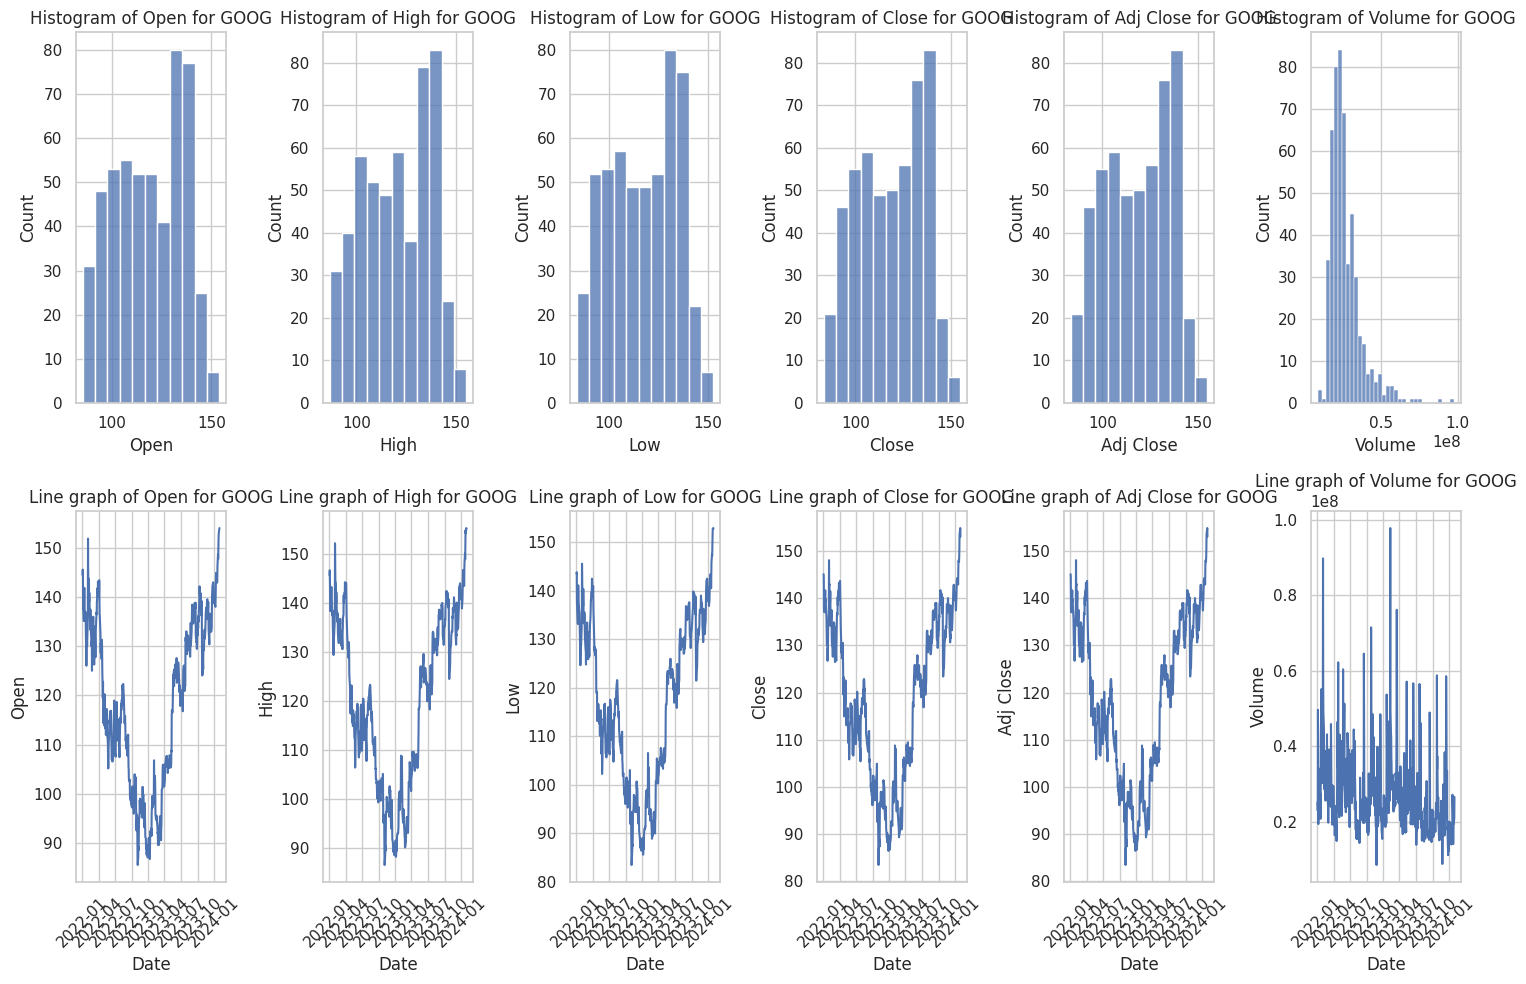

[*********************100%%**********************]  1 of 1 completed


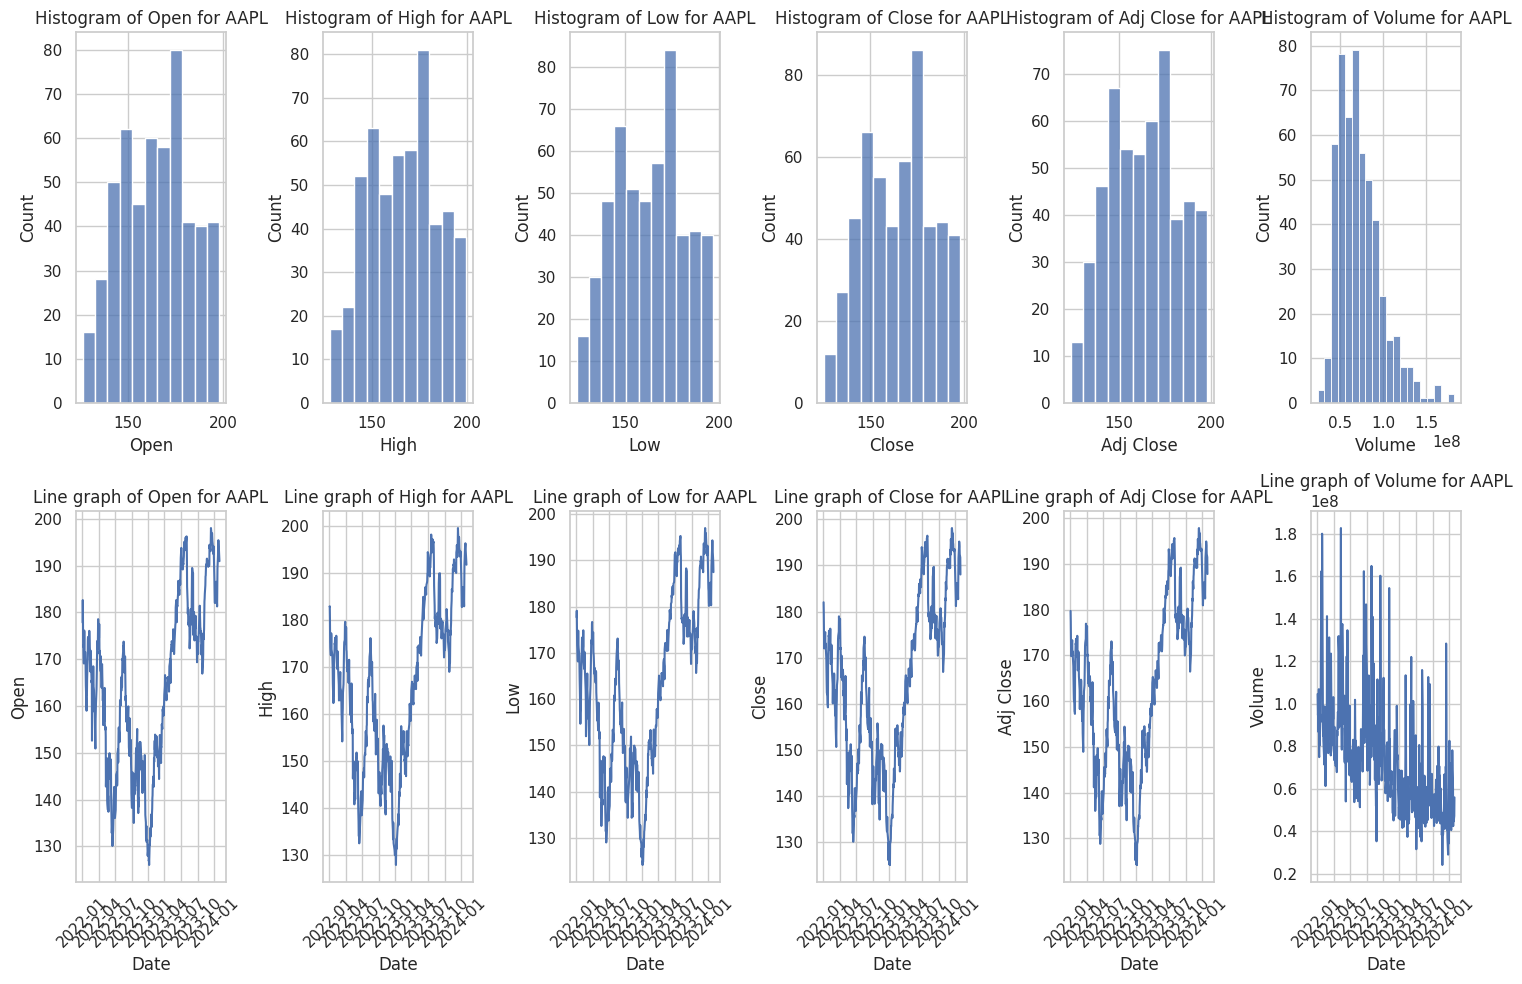

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Set the style for seaborn
sns.set(style="whitegrid")

stocks = ['ORCL', 'NVDA', 'GOOG', 'AAPL']


for stock in stocks:
    plt.figure(figsize=(15, 10))
    meta = yf.download(stock, start=start, end=end)

    # Get the number of columns
    num_cols = len(meta.columns)

    # Iterate through each column and create separate subplots
    for i, col in enumerate(meta.columns, 1):
        plt.subplot(2, num_cols, i)
        sns.histplot(meta[col])
        plt.title(f'Histogram of {col} for {stock}')
        plt.xlabel(col)

        plt.subplot(2, num_cols, num_cols + i)
        sns.lineplot(data=meta, x=meta.index, y=col)
        plt.title(f'Line graph of {col} for {stock}')
        plt.xticks(rotation=45)
        plt.xlabel('Date')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
meta.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


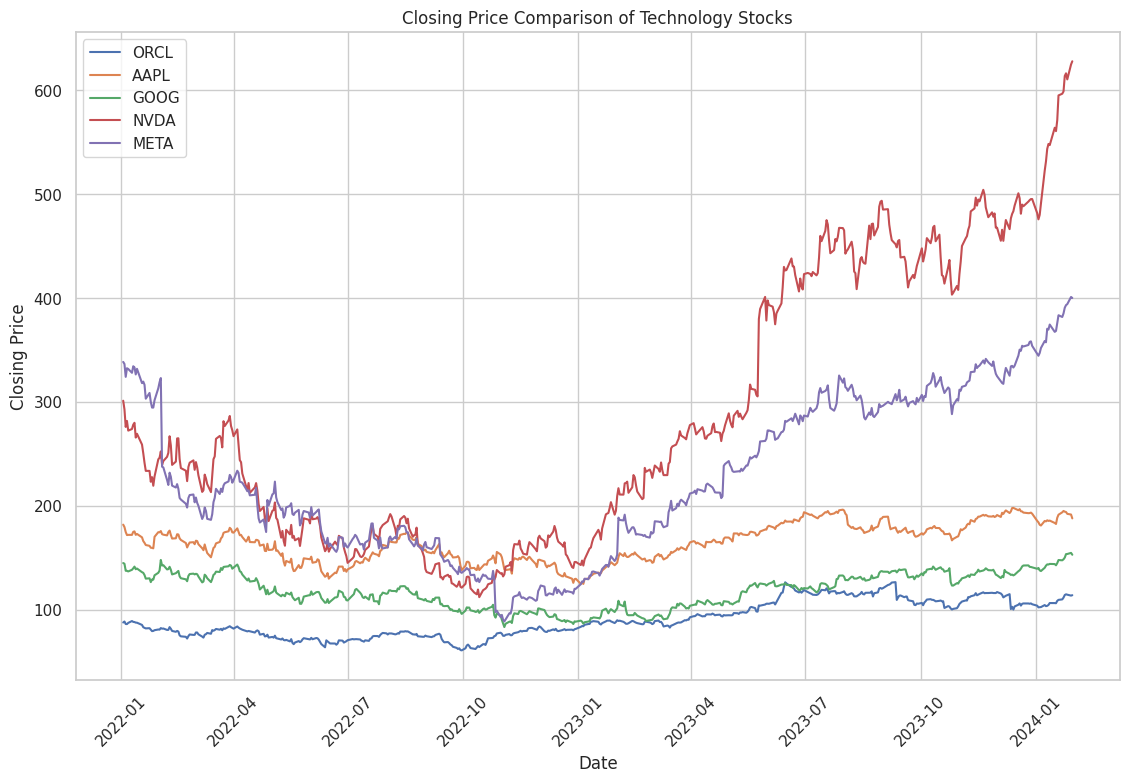

In [ ]:
import matplotlib.pyplot as plt
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the list of stocks
stocks = ["ORCL", "AAPL", "GOOG", "NVDA","META"]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each stock and plot its closing price
for stock in stocks:
    # Download the stock data
    meta = yf.download(stock, start, end)

    # Plot the closing price
    sns.lineplot(data=meta, x=meta.index, y="Close", label=stock, ax=ax)

# Set the title and labels
ax.set_title("Closing Price Comparison of Technology Stocks")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price")

# Rotate the x-axis tick labels
plt.xticks(rotation=45)

# Show the plot
plt.show()


# **Calclulate Kernel density for all stocks **


 Purpose of using kernel density estimation in stock market prediction is to gain insights into the distribution, volatility, and underlying structure of stock returns, which can inform trading strategies, risk management approaches, and investment decisions





[*********************100%%**********************]  5 of 5 completed


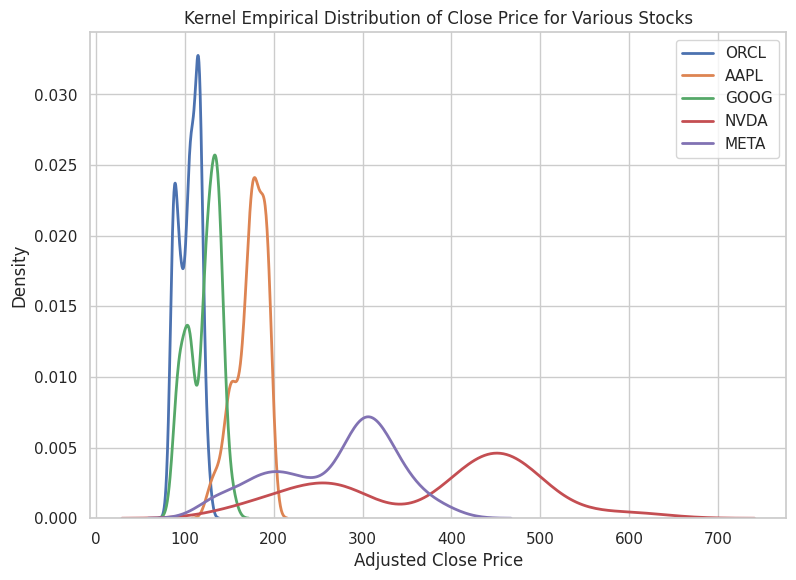

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Set the style for seaborn
sns.set(style="whitegrid")

# Define the list of stocks
stocks = ["ORCL", "AAPL", "GOOG", "NVDA", "META"]

# Download data for all stocks
data = yf.download(stocks, start='2023-01-01', end='2024-01-31')['Close']

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot KDE plots for all stocks
for stock in stocks:
    sns.kdeplot(data[stock], label=stock, linewidth=2)

# Set labels and title
plt.xlabel("Adjusted Close Price")
plt.ylabel("Density")
plt.title("Kernel Empirical Distribution of Close Price for Various Stocks")

# Add legend
plt.legend()

# Show the plot
plt.show()


# **Expected Vs Risk graph**

Each point on the graph represents a stock.
SThis is a common principle in finance known as the risk-return tradeoff.
The graph allows investors to compare the performance of these stocks based on their risk and return profiles. This can help in making informed investment decisions.



[*********************100%%**********************]  5 of 5 completed


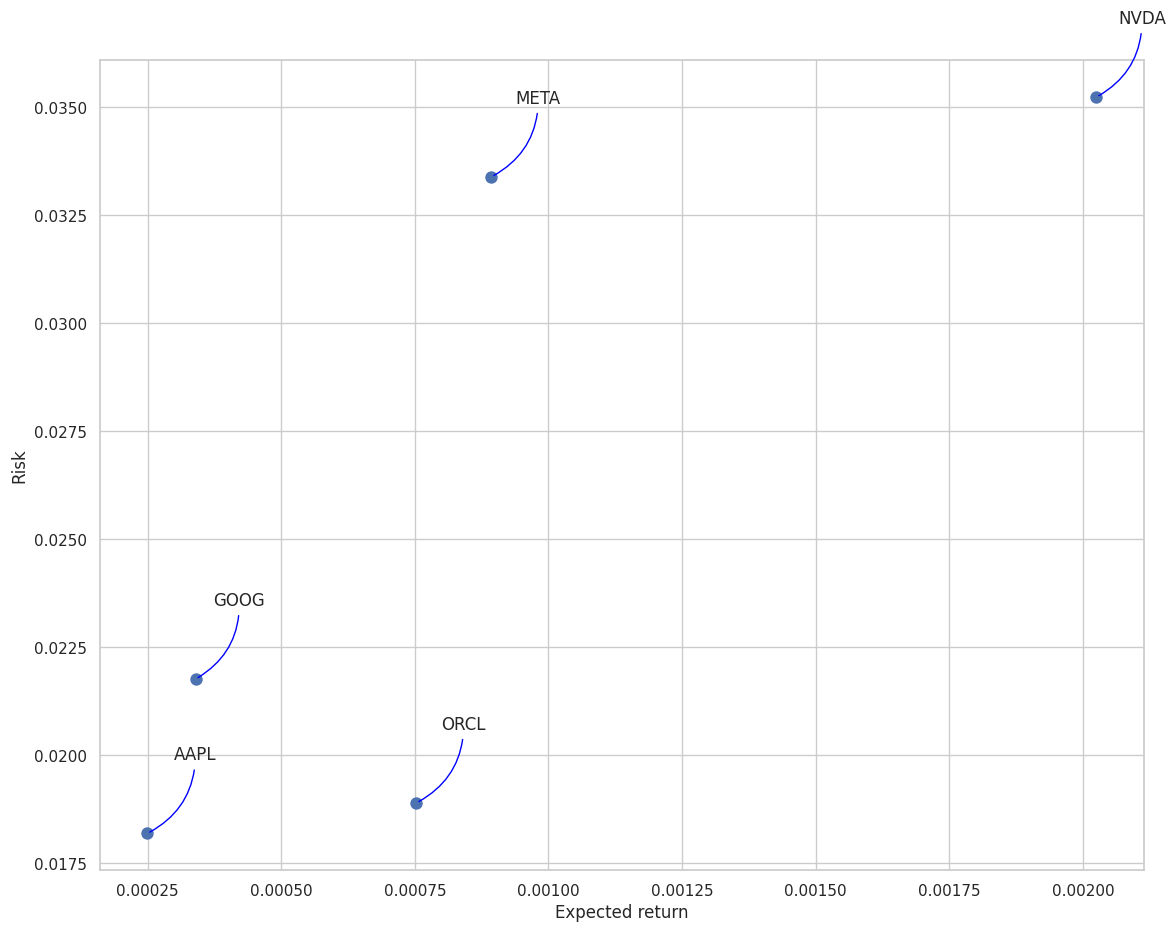

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Define the stocks
stocks = ['META', 'ORCL', 'NVDA', 'GOOG', 'AAPL']

# Download historical data for the stocks
data = yf.download(stocks, start, end)['Adj Close']

# Calculate daily returns
rets = data.pct_change().dropna()

# Set the size of the markers based on area
area = np.pi * 20

# Create the scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)

# Add labels and title
plt.xlabel("Expected return")
plt.ylabel("Risk")

# Annotate each point with the stock symbol
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(50, 50),
        textcoords="offset points",
        ha="right",
        va="bottom",
        arrowprops=dict(arrowstyle="-", color="blue", connectionstyle="arc3,rad=-0.3"),
    )

# Show the plot
plt.show()
